In [ ]:
from opt_lib_1 import *
import os
import matplotlib.pyplot as plt
# traverse whole directory
ordner = "TrafficDataset"
# def fMittelGrad(grads, ignore, N):
# 	order_mask = np.argsort(np.linalg.norm(grads, axis=0)) # nach i-ter achse sortieren, hier x achse -> 0
# 	grads_ordered = grads[:,order_mask]
# 	mittel_grad = np.sum(grads_ordered[:, : N-ignore], 1)/(N-ignore)
# 	return mittel_grad
# --------- Hyperparameter -----------------
ignorieren = 0
dt = 0.005
N = 1
gamma = 0.000001 # erstmal fix
np.random.seed(42)
mat_dateien = [
    f for f in os.listdir(ordner)
    if f.endswith(".mat") and os.path.isfile(os.path.join(ordner, f))
]
fileName = f"TrafficDataset/{mat_dateien[2]}" # mat_dateien[0]
dataset_nuber = 53
random_samples = [dataset_nuber]
# mat_dateien[2] 54
# mat_dateien[0] (5), 10


# # Datensatz 3
# L = 5 
# v_max = 30
# N = 1
# M = 5000 
# dt = 0.02
# sigma = 0.001

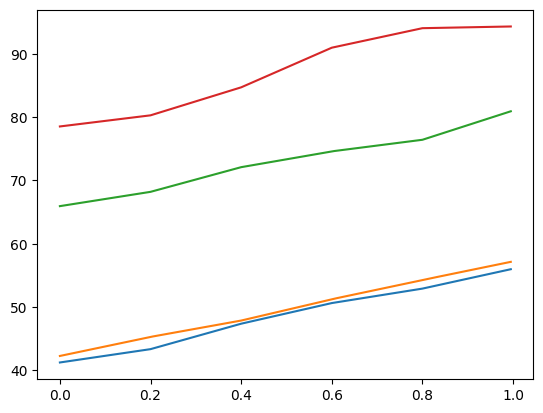

In [48]:
test = data_class(fileName)
test.set_numx(dt, L, v_max, model="log", n_dataset=dataset_nuber)
for i in range(test.get_x().shape[0]):
    plt.plot(test.get_t(),test.get_x()[i,:])


In [53]:
avg_v = np.zeros(test.get_x().shape[0])
for i in range(test.get_x().shape[0]):
	X = test.get_x()[i,:]
	avg_v[i] = np.average(np.array([(xip - xi)/dt for xi, xip in zip(X[:-1], X[1:])]))
 
np.average(avg_v)

np.float64(15.18206590242561)

In [51]:
L_in = 5 # 15
L = L_in
vmax_in = 15 # 30
v_max = vmax_in

# Const. sigma

In [71]:
M = 3000 # 5000

# Sammel Arrays
gradients = np.zeros((2, N))
vmax_arr = np.zeros(M)
L_arr = np.zeros(M)
grad_arr = np.zeros((M, 2))
J_arr_sammel = np.zeros(N) 
J_arr = np.zeros(M)
test = data_class(fileName)
earlyStopping = 10
earlyStopping_counter = 0

sigma = [0.002, 0.002] # Amijo Bed.
for j in range(M):
	random_samples = [dataset_nuber]
    # random_samples = np.random.randint(0, test.get_len()-1, (N))
	for k, sample in enumerate(random_samples):
		test.set_numx(dt, L, v_max, model="log", n_dataset=sample)
		Pges = test.pGes(dt, v_max)
		d = np.array([test.d(i) for i in test.get_x().T]).T
		Teil_grad = test.gradient(Pges, d, v_max, L, dt)
		# (update stepsize) bei uns fix
		gradients[:, k] = Teil_grad
		J_arr_sammel[k] = test.get_J()
	J_arr[j] = np.sum(J_arr_sammel)/J_arr_sammel.shape[0]
	vmax_arr[j] = v_max
	L_arr[j] = L
	mittel_grad = np.sum(gradients, 1)/N
	grad_arr[j,:] = mittel_grad
	if v_max + sigma[0] * mittel_grad[0] > 0:
		v_max = v_max + sigma[0] * mittel_grad[0]
	if L + sigma[1] * mittel_grad[1] > 0:
		L = L + sigma[1] * mittel_grad[1]
	if j != 0:		
		if J_arr[j] > J_arr[j-1]:
			earlyStopping_counter += 1
		else:
			earlyStopping_counter = 0
	if earlyStopping_counter == earlyStopping:
		break


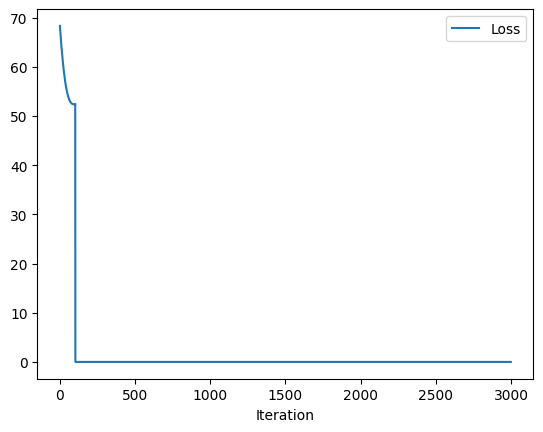

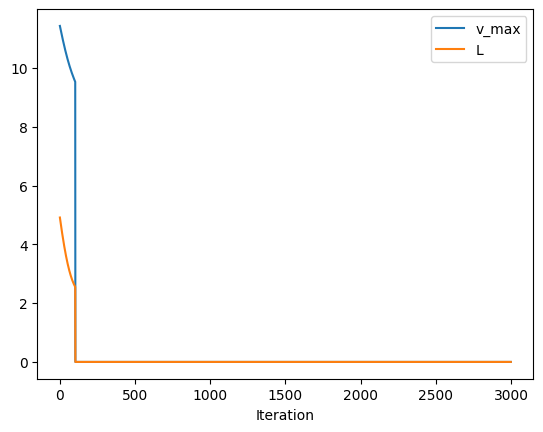

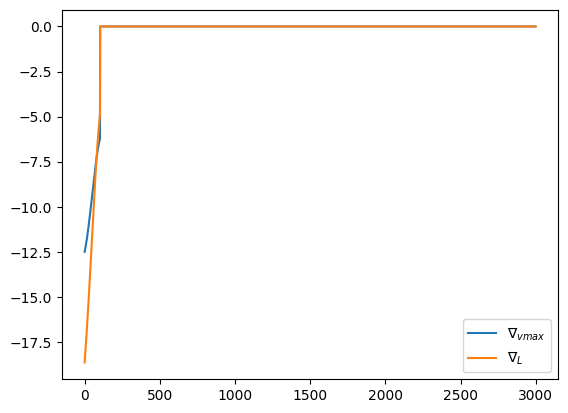

(np.float64(9.512927101808403), np.float64(2.5387309742334163))

In [72]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(J_arr)), J_arr, label="Loss", marker = "")
ax = plt.gca()
# xmin, xmax = 3000, 8000
#ymin, ymax = 8, 9.5
#ax.set_ylim([ymin, ymax])
# ax.set_xlim([xmin, xmax])
plt.legend()
plt.xlabel("Iteration")
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_single{dataset_nuber}_M{M}L{L_in}Vmax{vmax_in}dt{dt}Fixedsigma{sigma[0]}_Figure_Loss.pdf", dpi=40)
plt.show()
plt.plot(range(len(vmax_arr)), vmax_arr, label = "v_max", marker = "")
plt.plot(range(len(L_arr)), L_arr, label = "L",  marker = "")
plt.legend()
plt.xlabel("Iteration")
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_single{dataset_nuber}_M{M}L{L_in}Vmax{vmax_in}dt{dt}Fixedsigma{sigma[0]}_Figure_ParameterEntwicklung.pdf", dpi=40)
plt.show()
plt.plot(range(grad_arr.shape[0]), grad_arr[:,0], label=r"$\nabla_{vmax}$", marker = "")
plt.plot(range(grad_arr.shape[0]), grad_arr[:,1], label=r"$\nabla_{L}$", marker = "")
plt.legend()
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_single{dataset_nuber}_M{M}L{L_in}Vmax{vmax_in}dt{dt}Fixedsigma{sigma[0]}_Figure_GradEntwicklung.pdf", dpi=40)
plt.show()
v_max, L

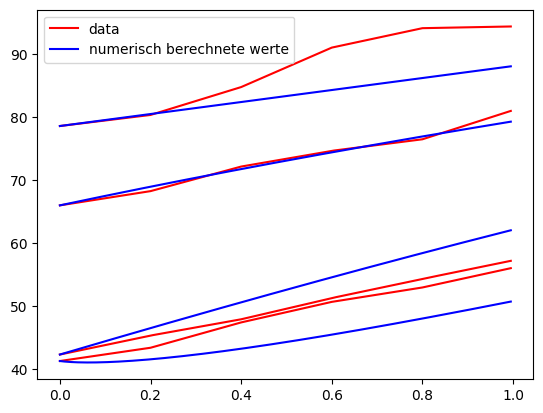

In [73]:
# OPtimiierungs prozess an trajektoreien zeigen
for i in range(test.get_x().shape[0]):
	if i == 0: 
		plt.plot(test.get_t(), test.get_x()[0,:], label="data", color = "r")
		plt.plot(test.get_t(),test.get_numx()[0,:],label="numerisch berechnete werte", color = "b")
	else:
		plt.plot(test.get_t(), test.get_x()[i,:], color = "r")
		plt.plot(test.get_t(),test.get_numx()[i,:], color = "b")

max = len(test.get_gesnumx())
for i in np.arange(0, max, 100):
    for j in range(test.get_x().shape[0]):
    	plt.plot(test.get_t(), test.get_gesnumx()[i][j,:], alpha = 0.1, color="gray")
plt.legend()
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_{dataset_nuber}Fixedsigma{sigma[0]}_Figure_Ges_IterationShadow.pdf", dpi=40)
plt.show()

# Armijo bedingung

In [64]:
gradients = np.zeros((2, N))
vmax_arr = []
L_arr = []
np.random.seed(42)
grad_arr = np.zeros((M, 2))
J_arr_sammel = np.empty(N) 
J_arr = []
sig_used = []

earlyStopping = 10
earlyStopping_counter = 0
L = L_in
v_max = vmax_in
test = data_class(fileName)
sigma = np.array([1/(2**i) for i in np.arange(0,30)]) # Amijo Bed.
#random_samples = np.random.randint(0, test.get_len()-1, (N))
for k, sample in enumerate(random_samples):
        test.set_numx(dt, L, v_max, model="log", n_dataset=sample, save=True)
        Pges = test.pGes(dt, v_max)
        d = np.array([test.d(i) for i in test.get_x().T]).T
        mittel_grad = test.gradient(Pges, d, v_max, L, dt)
        # (update stepsize) bei uns fix
        # gradients[:, k] = Teil_grad
        J_initial = test.get_J()
# mittel_grad = fMittelGrad(gradients, ignorieren, N)
# J_initial = np.sum(J_arr_sammel)/J_arr_sammel.shape[0]
J_arr.append(J_initial)
count = 0
grad_arr[count,:] = mittel_grad
Weiter = True
for j in range(M):
	if j != 0:
		random_samples = [dataset_nuber]
		#random_samples = np.random.randint(0, test.get_len()-1, (N))
		for k, sample in enumerate(random_samples):
			test.set_numx(dt, L, v_max, model="log", n_dataset=sample, save=False)
			Pges = test.pGes(dt, v_max)
			d = np.array([test.d(i) for i in test.get_x().T]).T
			mittel_grad = test.gradient(Pges, d, v_max, L, dt)
			# (update stepsize) bei uns fix
			# gradients[:, k] = Teil_grad
			J_alt = test.get_J()
			
		# mittel_grad = fMittelGrad(gradients, ignorieren, N)
		# J_alt = np.sum(J_arr_sammel)/J_arr_sammel.shape[0]
	else:
		J_alt = J_initial
	for sig in sigma:
		kurz_vmax = v_max + sig * mittel_grad[0]
		kurz_L = L + sig * mittel_grad[1]
		for k, sample in enumerate(random_samples):
			test.set_numx(dt, kurz_L, kurz_vmax, model="log", n_dataset=sample, save=False)
			J_mittel = test.get_J()
			
		# J_mittel = np.sum(J_arr_sammel)/J_arr_sammel.shape[0]
		if J_mittel - J_alt <= (-1) * sig * gamma * np.power(np.linalg.norm(mittel_grad), 2):
			print(f"Sigma hat funktioniert: {sig}")
			sig_used.append(sig)
			Weiter = True
			if J_mittel > J_arr[-1]:
				earlyStopping_counter += 1
			else:
				earlyStopping_counter = 0
			break
		if sig == np.min(sigma):
			print(f"Kein Sigma gefunden in iteration: {j}, mit grad = {np.power(np.linalg.norm(mittel_grad), 2)}")
			Weiter = False
	if earlyStopping_counter == earlyStopping:
		break
	if Weiter:
		# für die gewählte Schrittweite die adjungierte etc bestimmen
		for k, sample in enumerate(random_samples):
			test.set_numx(dt, kurz_L, kurz_vmax, model="log", n_dataset=sample, save=True)
			Pges = test.pGes(dt, kurz_vmax)
			d = np.array([test.d(i) for i in test.get_x().T]).T
			mittel_grad = test.gradient(Pges, d, kurz_vmax, kurz_L, dt)
			# (update stepsize) bei uns fix
			# mittel_grad = Teil_grad
			J_mittel = test.get_J()
			
		# mittel_grad = fMittelGrad(gradients, ignorieren, N)
		# J_mittel = np.sum(J_arr_sammel)/J_arr_sammel.shape[0]
		# Das entsprechende Update mit ausgerechneter Schrittweite machen
		if v_max + sig* mittel_grad[0] > 0:
			v_max = v_max + sig * mittel_grad[0]
		if L + sig * mittel_grad[1] > 0:
			L = L + sig * mittel_grad[1]
		J_arr.append(J_mittel)
		J_vgl = J_mittel
		vmax_arr.append(v_max)
		L_arr.append(L)
		count += 1
		grad_arr[count,:] = mittel_grad
		
	else:
		break

/home/tim/Dokumente/GitEnv/Opt1/opt_lib_1.py:132: RuntimeWarning: invalid value encountered in log
  v = v_max * np.log(d)


Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125
Sigma hat funktioniert: 0.125


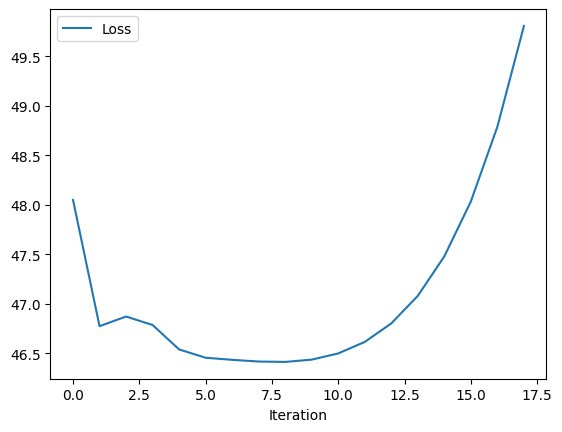

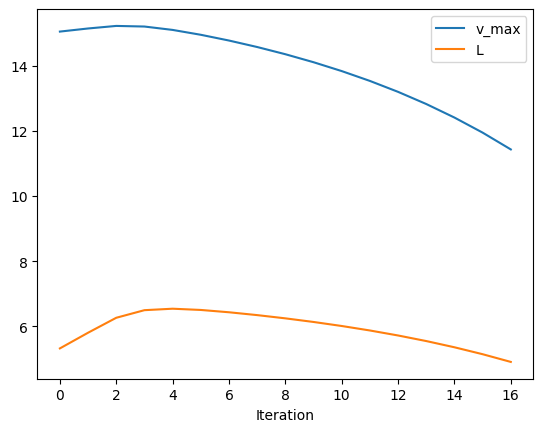

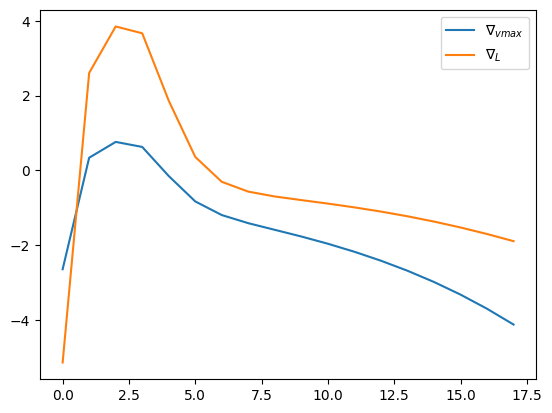

(np.float64(11.42813048463061), np.float64(4.911324637561117))

In [65]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(J_arr)), J_arr, label="Loss", marker = "")
ax = plt.gca()
# xmin, xmax = 3000, 8000
#ymin, ymax = 8, 9.5
#ax.set_ylim([ymin, ymax])
# ax.set_xlim([xmin, xmax])
plt.legend()
plt.xlabel("Iteration")
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_single{dataset_nuber}_M{M}L{L_in}Vmax{vmax_in}dt{dt}armijo_gamma{gamma}_Figure_Loss.pdf", dpi=40)
plt.show()
plt.plot(range(len(vmax_arr)), vmax_arr, label = "v_max", marker = "")
plt.plot(range(len(L_arr)), L_arr, label = "L",  marker = "")
plt.legend()
plt.xlabel("Iteration")
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_single{dataset_nuber}_M{M}L{L_in}Vmax{vmax_in}dt{dt}armijo_gamma{gamma}_Figure_ParameterEntwicklung.pdf", dpi=40)
plt.show()
mask = grad_arr == 0
grad = grad_arr[:int(np.min(np.where(mask)[0])), :]
plt.plot(range(grad.shape[0]), grad[:,0], label=r"$\nabla_{vmax}$", marker = "")
plt.plot(range(grad.shape[0]), grad[:,1], label=r"$\nabla_{L}$", marker = "")
plt.legend()
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_single{dataset_nuber}_M{M}L{L_in}Vmax{vmax_in}dt{dt}armijo_gamma{gamma}_Figure_GradEntwicklung.pdf", dpi=40)
plt.show()
v_max, L

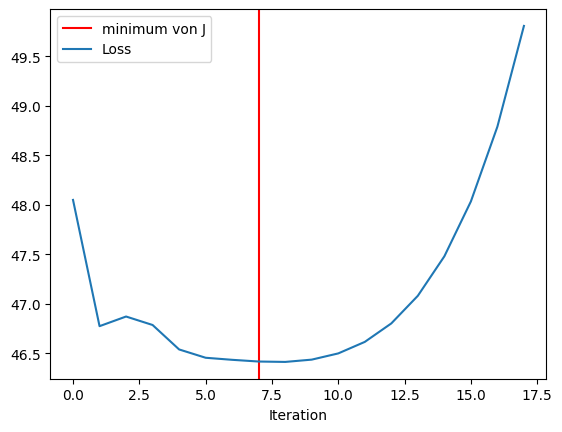

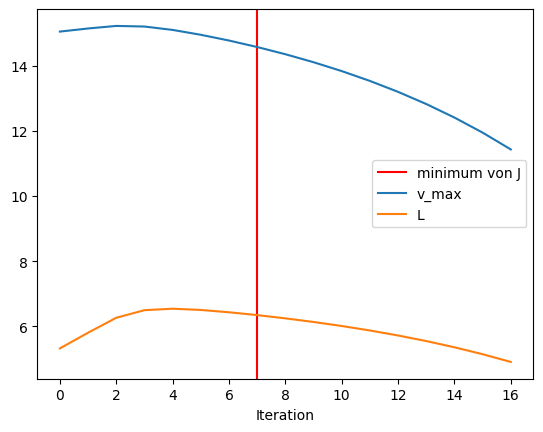

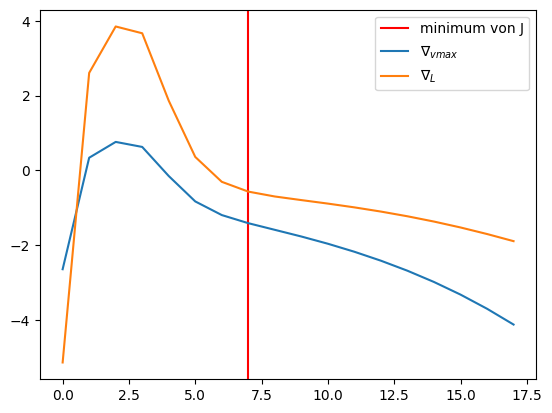

(np.float64(14.569085915858663), np.float64(6.346954284971464))

In [70]:
# Minimum von L bestimmen
dJ = np.array([J_i - J_ip for J_i , J_ip in zip(J_arr[:-1], J_arr[1:])])
minimum_index = np.where(dJ == np.min(np.abs(dJ)))[0][0]

ax = plt.gca()
plt.axvline(x=minimum_index, label="minimum von J", color="red")
plt.plot(np.arange(len(J_arr)), J_arr, label="Loss", marker = "")

# xmin, xmax = 3000, 8000
#ymin, ymax = 8, 9.5
#ax.set_ylim([ymin, ymax])
# ax.set_xlim([xmin, xmax])
plt.legend()
plt.xlabel("Iteration")
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_single{dataset_nuber}_M{M}L{L_in}Vmax{vmax_in}dt{dt}armijo_gamma{gamma}_Figure_Loss_marked.pdf", dpi=40)
plt.show()
plt.axvline(x=minimum_index, label="minimum von J", color="red")
plt.plot(range(len(vmax_arr)), vmax_arr, label = "v_max", marker = "")
plt.plot(range(len(L_arr)), L_arr, label = "L",  marker = "")
plt.legend()
plt.xlabel("Iteration")
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_single{dataset_nuber}_M{M}L{L_in}Vmax{vmax_in}dt{dt}armijo_gamma{gamma}_Figure_ParameterEntwicklung_marked.pdf", dpi=40)
plt.show()
mask = grad_arr == 0
grad = grad_arr[:int(np.min(np.where(mask)[0])), :]
plt.axvline(x=minimum_index, label="minimum von J", color="red") 
plt.plot(range(grad.shape[0]), grad[:,0], label=r"$\nabla_{vmax}$", marker = "")
plt.plot(range(grad.shape[0]), grad[:,1], label=r"$\nabla_{L}$", marker = "")
plt.legend()
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_single{dataset_nuber}_M{M}L{L_in}Vmax{vmax_in}dt{dt}armijo_gamma{gamma}_Figure_GradEntwicklung_marked.pdf", dpi=40)
plt.show()
vmax_arr[minimum_index], L_arr[minimum_index]

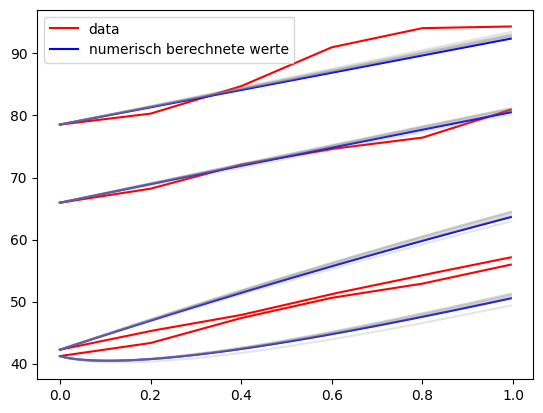

In [67]:
# OPtimiierungs prozess an trajektoreien zeigen
for i in range(test.get_x().shape[0]):
	if i == 0: 
		plt.plot(test.get_gesT()[minimum_index], test.get_gesx()[minimum_index][0,:], label="data", color = "r")
		plt.plot(test.get_gesT()[minimum_index], test.get_gesnumx()[minimum_index][0,:],label="numerisch berechnete werte", color = "b")
	else:
		plt.plot(test.get_gesT()[minimum_index], test.get_gesx()[minimum_index][i,:], color = "r")
		plt.plot(test.get_gesT()[minimum_index], test.get_gesnumx()[minimum_index][i,:], color = "b")

max = len(test.get_gesnumx())
for i in np.arange(0, minimum_index, 1): # max
    for j in range(test.get_x().shape[0]):
    	plt.plot(test.get_t(), test.get_gesnumx()[i][j,:], alpha = 0.2, color="gray")
plt.legend()
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_{dataset_nuber}_armijo_Figure_Ges_IterationShadow_marked.pdf", dpi=40)
plt.show()


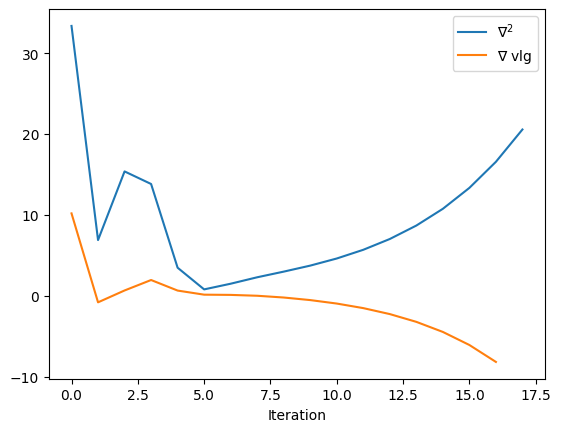

In [68]:
def Grad_test(J, vmax, l):
    grad_v = [(J_i - J_ip)/v_i-v_ip for J_i, J_ip, v_i, v_ip in zip(J[:-1], J[1:], vmax[:-1], vmax[1:]) ]
    grad_l = [(J_i - J_ip)/l_i-l_ip for J_i, J_ip, l_i, l_ip in zip(J[:-1], J[1:], l[:-1], l[1:]) ]
    return np.array([grad_v, grad_l]).T

def Grad_test_sig(J, sig_arr):
    grad_v = [(J_i - J_ip)/sig_i for J_i, J_ip, sig_i in zip(J[:-1], J[1:], sig_arr)]
    return np.array(grad_v)

grad_vgl = Grad_test_sig(J_arr, sig_used)


mask = grad_arr == 0
grad = grad_arr[:int(np.min(np.where(mask)[0])), :]
# plt.plot(range(grad.shape[0]), grad[:,0], label=r"$\nabla_{vmax}$", marker = "")
# plt.plot(range(grad.shape[0]), grad[:,1], label=r"$\nabla_{L}$", marker = "")
plt.plot(range(grad.shape[0]), np.power(np.linalg.norm(grad, axis = 1), 2), label=r"$\nabla^2$", marker = "")
plt.plot(range(grad_vgl.shape[0]), grad_vgl, label=r"$\nabla$ vlg", marker = "")
# plt.plot(range(grad_vgl.shape[0]), grad_vgl[:,1], label=r"$\nabla_{L}$ vlg", marker = "")
plt.xlabel("Iteration")
plt.legend()
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_single{dataset_nuber}_M{M}L{L_in}Vmax{vmax_in}dt{dt}armijo_gamma{gamma}_Figure_Gradvgl.pdf", dpi=40)
plt.show()


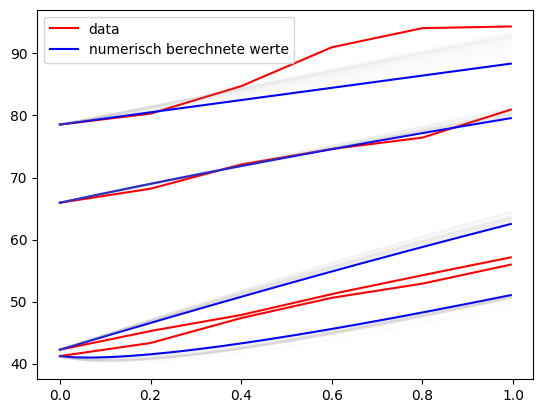

In [69]:
# OPtimiierungs prozess an trajektoreien zeigen
for i in range(test.get_x().shape[0]):
	if i == 0: 
		plt.plot(test.get_t(), test.get_x()[0,:], label="data", color = "r")
		plt.plot(test.get_t(),test.get_numx()[0,:],label="numerisch berechnete werte", color = "b")
	else:
		plt.plot(test.get_t(), test.get_x()[i,:], color = "r")
		plt.plot(test.get_t(),test.get_numx()[i,:], color = "b")

max = len(test.get_gesnumx())
for i in np.arange(0, max, 1):
    for j in range(test.get_x().shape[0]):
    	plt.plot(test.get_t(), test.get_gesnumx()[i][j,:], alpha = 0.03, color="gray")
plt.legend()
plt.savefig(f"Bilder/{fileName.split("/")[1].split(".")[0]}_{dataset_nuber}_armijo_Figure_Ges_IterationShadow.pdf", dpi=40)
plt.show()


# Was passiert für größere Kolonnen?

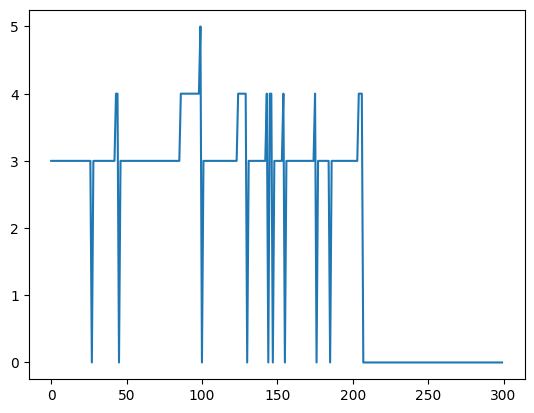

In [35]:
fileName = "TrafficDataset/sequence_data1-1_1.mat"
test = data_class(fileName)
lens = np.zeros((3,300))
anz = []
import os
import matplotlib.pyplot as plt
# traverse whole directory
ordner = "TrafficDataset"
mat_dateien = [
    f for f in os.listdir(ordner)
    if f.endswith(".mat") and os.path.isfile(os.path.join(ordner, f))
]
counter = 0
for k, file in enumerate(mat_dateien):
	test = data_class(f"{ordner}/{file}")
	anz.append(test.get_len())
	for i in range(test.get_len()-1):
		test.next_dataset()
		lens[0, counter + i] = test.get_x().shape[0]
		lens[1, counter + i] = k
		lens[2, counter + i] = i
		# lens.append(test.get_x().shape[0])
	counter += test.get_len()
plt.plot(range(len(lens[0,:])),lens[0,:])

In [36]:
np.max(np.array(lens[0,:]))

np.float64(5.0)

In [37]:
np.where(np.array(lens[0,:]) == np.max(np.array(lens[0,:]))), anz

((array([99]),), [28, 18, 55, 30, 14, 3, 8, 21, 9, 22])

In [39]:
lens[:,99] # 5 autos, 2. Datensatz, 53. Messung

array([ 5.,  2., 53.])